# Wine Quality Analysis

## 1. Data Exploration

### 1A. Distribution of Wine Quality Scores

We start by exploring the dataset to understand the distribution of quality scores for red and white wines.  
This will help us see if there are any noticeable differences between the two types of wine.

We will:
- Load the datasets
- Check basic statistics and distributions
- Compare the quality distributions between red and white wines
- Visualize the distributions using histograms and KDE plots

In [21]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load Datasets
Load the red and white wine datasets into separate DataFrames for analysis.

In [22]:
# Load datasets
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

### 2. Basic Statistics
Check basic statistics and distributions for red and white wine quality.

In [23]:
# Check basic statistics
print("Red Wine Quality Distribution:")
print(red_wine["quality"].describe())
print("\nWhite Wine Quality Distribution:")
print(white_wine["quality"].describe())

Red Wine Quality Distribution:
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

White Wine Quality Distribution:
count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


### 3. Visualize Quality Distributions
Plot histograms to compare the quality distributions of red and white wines.

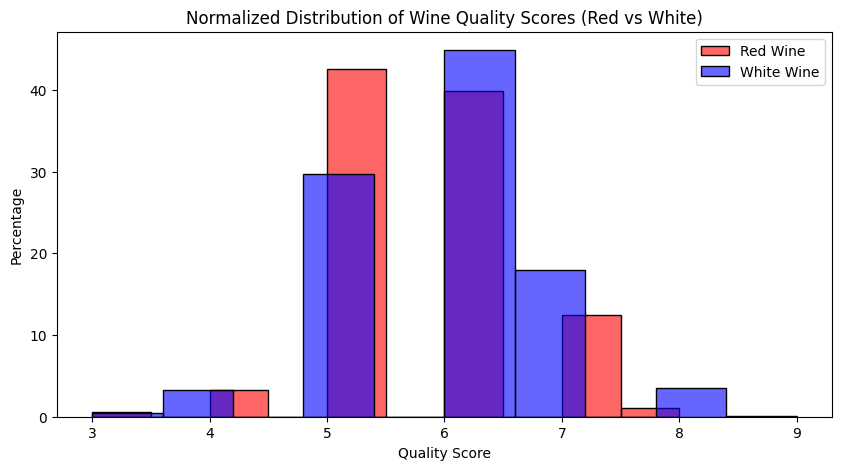

In [24]:
# Plot the distribution of wine quality
plt.figure(figsize=(10, 5))
sns.histplot(red_wine["quality"], bins=10, kde=False, color="red", label="Red Wine", alpha=0.6, stat="percent")
sns.histplot(white_wine["quality"], bins=10, kde=False, color="blue", label="White Wine", alpha=0.6, stat="percent")

plt.title("Normalized Distribution of Wine Quality Scores (Red vs White)")
plt.xlabel("Quality Score")
plt.ylabel("Percentage")
plt.legend()
plt.show()

### Red Wine Quality Distribution
The distribution of red wine quality is summarized as follows:
- **Count**: 1599 samples
- **Mean**: 5.64
- **Standard Deviation**: 0.81
- **Minimum Quality**: 3
- **25th Percentile (Q1)**: 5
- **Median (50th Percentile)**: 6
- **75th Percentile (Q3)**: 6
- **Maximum Quality**: 8

This distribution indicates that most red wines have a quality score around 5 and 6, with a few higher-quality wines reaching up to 8. The mean quality score for red wines is 5.64, suggesting that the overall quality is relatively low to moderate.

---

### White Wine Quality Distribution
The distribution of white wine quality is summarized as follows:
- **Count**: 4898 samples
- **Mean**: 5.88
- **Standard Deviation**: 0.89
- **Minimum Quality**: 3
- **25th Percentile (Q1)**: 5
- **Median (50th Percentile)**: 6
- **75th Percentile (Q3)**: 6
- **Maximum Quality**: 9

White wines have a mean quality score of 5.88, which is slightly higher than red wines. The distribution is very similar to red wines, with most of the quality scores around 5 to 6, though the maximum score can go up to 9. This suggests that white wines may have a slightly broader range of quality scores than red wines.

---

### Comparison of Red and White Wine Quality Distributions
- **Mean Quality**: White wines have a slightly higher mean quality score (5.88) compared to red wines (5.64).
- **Range**: Both types of wine have a similar range of quality scores, with red wines having a maximum of 8 and white wines reaching 9.
- **Skewness**: Both distributions are centered around a quality score of 6, indicating that most wines are rated in the middle of the quality scale, with a few outliers towards the higher end.

These observations suggest that while red and white wines share similarities in quality distribution, white wines may have a slightly higher average quality.

## 1B. Discretising Alcohol Content

To understand the relationship between alcohol content and wine quality we will create a categorial variable ('alcohol_cat'). This labels white and red wine seperately into categories **low**, **mid**, **high**.

- **Low**: Alcohol < (mean - std)
- **Mid**: Between (mean - std) and (mean + std)
- **High**: Alcohol > (mean + std)

This will help analyse how alcohol levels relates to quality.

In [25]:
# Discretize alcohol content for red wine
red_mean = red_wine['alcohol'].mean()
red_std = red_wine['alcohol'].std()
def alcohol_category_red(alcohol):
    if alcohol < red_mean - red_std:
        return 'low'
    elif alcohol > red_mean + red_std:
        return 'high'
    else:
        return 'mid'
red_wine['alcohol_cat'] = red_wine['alcohol'].apply(alcohol_category_red)
# Discretize alcohol content for white wine
white_mean = white_wine['alcohol'].mean()
white_std = white_wine['alcohol'].std()
def alcohol_category_white(alcohol):
    if alcohol < white_mean - white_std:
        return 'low'
    elif alcohol > white_mean + white_std:
        return 'high'
    else:
        return 'mid'
white_wine['alcohol_cat'] = white_wine['alcohol'].apply(alcohol_category_white)

### 5. Visualize Quality by Alcohol Category
Plot the quality distribution for red and white wines by alcohol category.

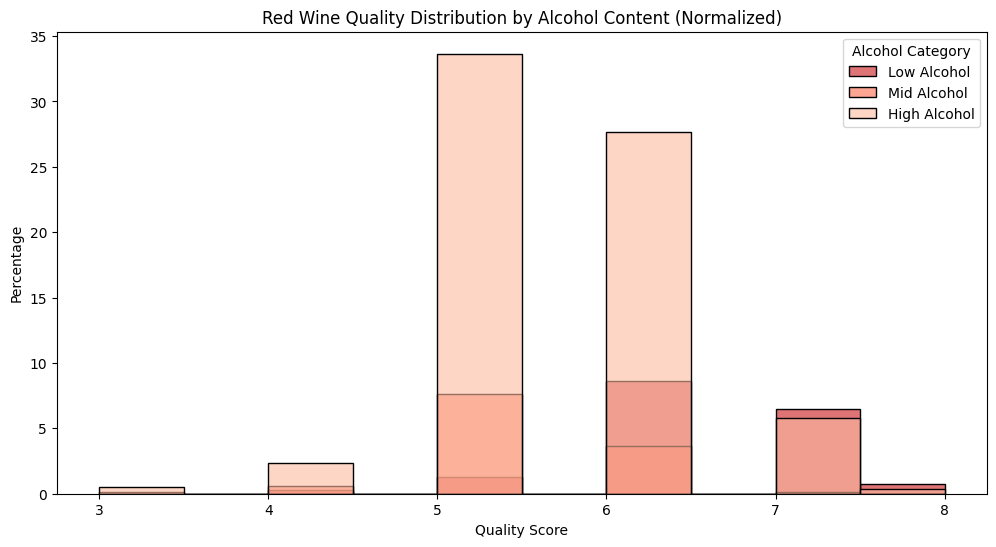

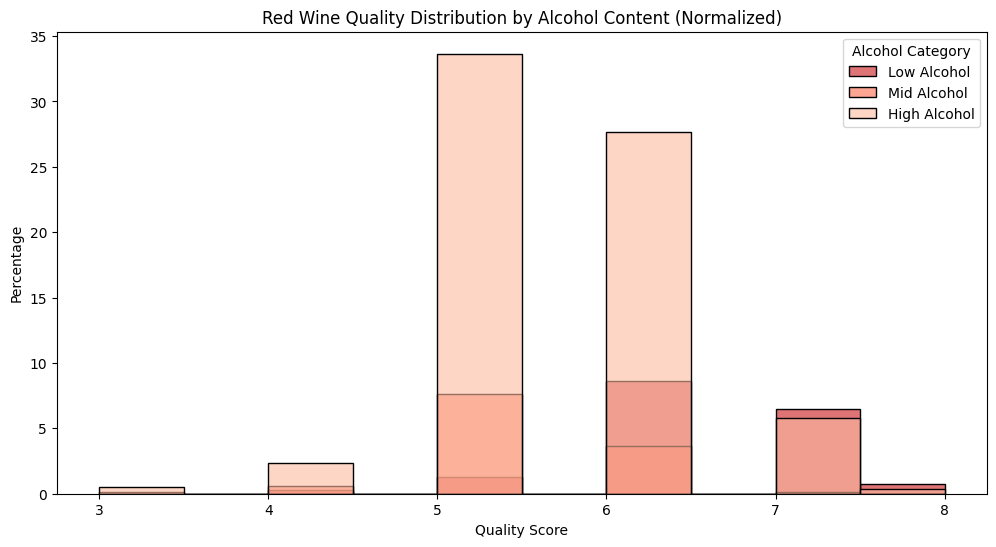

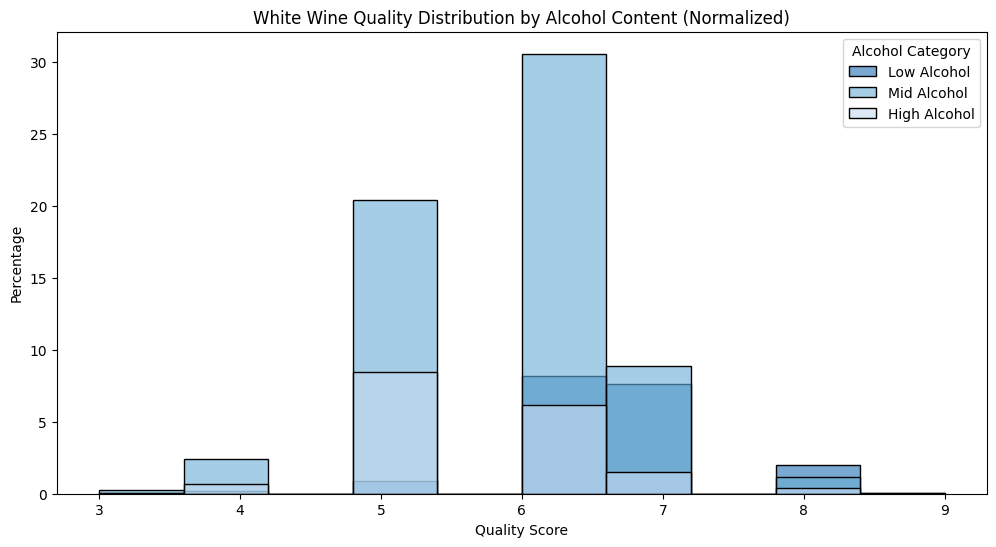

In [26]:
# Plot quality distribution for red wine by alcohol category
plt.figure(figsize=(12, 6))
sns.histplot(data=red_wine, x="quality", hue="alcohol_cat", bins=10, kde=False, palette="Reds", alpha=0.6, stat="percent")
plt.title("Red Wine Quality Distribution by Alcohol Content (Normalized)")
plt.xlabel("Quality Score")
plt.ylabel("Percentage")
plt.legend(title="Alcohol Category", labels=["Low Alcohol", "Mid Alcohol", "High Alcohol"])  # legend labels
plt.show()

# Plot quality distribution for white wine by alcohol category
plt.figure(figsize=(12, 6))
sns.histplot(data=white_wine, x="quality", hue="alcohol_cat", bins=10, kde=False, palette="Blues", alpha=0.6, stat="percent")
plt.title("White Wine Quality Distribution by Alcohol Content (Normalized)")
plt.xlabel("Quality Score")
plt.ylabel("Percentage")
plt.legend(title="Alcohol Category", labels=["Low Alcohol", "Mid Alcohol", "High Alcohol"])  # legend labels
plt.show()

### 1C. Conclusions On the Relationship Between Alcohol Content and Quality

#### **1. Red Wine**
- **High Alcohol Content**:
  - A higher percentage of red wines with **high alcohol content** have quality scores of **7 or 8**, indicating that higher alcohol content is positively associated with higher quality.
  - The peak of the distribution for high alcohol wines is shifted toward higher quality scores compared to the other categories.

- **Low Alcohol Content**:
  - Red wines with **low alcohol content** are more likely to have lower quality scores, with the majority falling in the **5 or 6** range.
  - This suggests that low alcohol content is associated with lower quality.

- **Mid Alcohol Content**:
  - Red wines with **mid alcohol content** show a more balanced distribution, with peaks around quality scores of **6 and 7**.
  - This indicates that mid alcohol wines can vary widely in quality.

---

#### **2. White Wine**
- **High Alcohol Content**:
  - Similar to red wine, white wines with **high alcohol content** have a higher percentage of wines with quality scores of **7 or 8**.
  - The distribution for high alcohol wines is skewed toward higher quality scores.

- **Low Alcohol Content**:
  - White wines with **low alcohol content** are more likely to have quality scores of **5 or 6**, indicating a negative association between low alcohol content and quality.

- **Mid Alcohol Content**:
  - White wines with **mid alcohol content** show a broader distribution, with peaks around quality scores of **6 and 7**, similar to red wines.

---

#### **3. General Observations**
- **Positive Correlation**:
  - For both red and white wines, there is a clear positive relationship between alcohol content and quality. Wines with higher alcohol content are more likely to have higher quality scores.
  
- **Low Alcohol Wines**:
  - Wines with low alcohol content tend to have lower quality scores, suggesting that alcohol content may play a role in enhancing the flavor profile or balance of the wine.

- **Mid Alcohol Wines**:
  - Mid alcohol wines show a more balanced distribution of quality scores, indicating that they can vary widely in quality.

---

### Supporting Evidence from Graphs
1. **Red Wine Graph**:
   - The normalized histogram for red wine shows that the percentage of wines with high alcohol content increases as quality scores rise, peaking at scores of 7 and 8.
   - Conversely, low alcohol wines have a higher percentage at lower quality scores (5 and 6).

2. **White Wine Graph**:
   - The normalized histogram for white wine shows a similar trend, with high alcohol wines peaking at higher quality scores (7 and 8) and low alcohol wines peaking at lower scores (5 and 6).

---

### Conclusion
The graphs provide strong evidence of a **positive relationship between alcohol content and wine quality** for both red and white wines. Higher alcohol content is generally associated with higher quality scores, while lower alcohol content is linked to lower quality scores. This trend is consistent across both types of wine.



## 1D. Identifying Threshold for Sweet and Dry Wines

To understand the relationship between sweet/dry wines and quality we will create a new `residual sugar` variable to seperate **sweet** from **dry** wines.



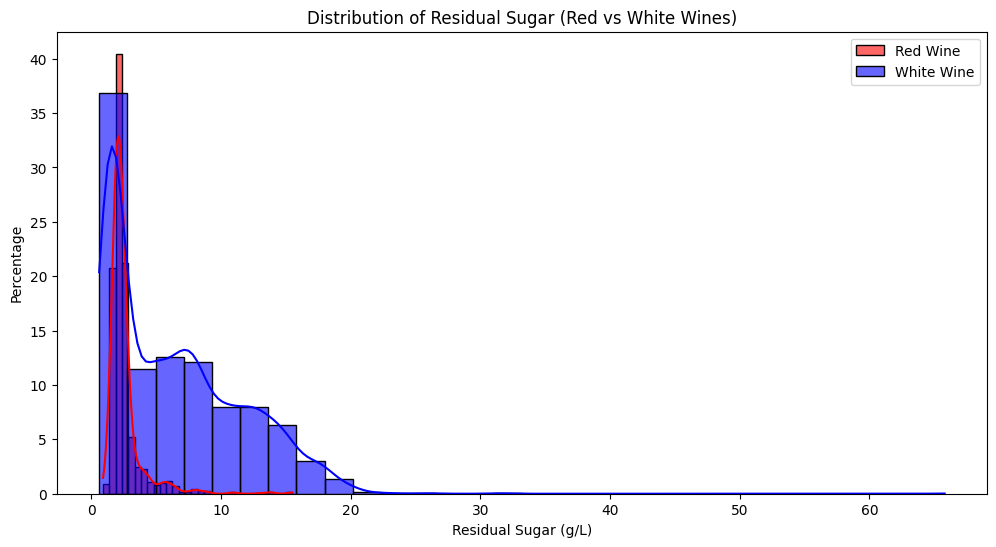

In [27]:
import numpy as np

plt.figure(figsize=(12, 6))
sns.histplot(red_wine['residual sugar'], bins=30, kde=True, color="red", label="Red Wine", alpha=0.6, stat="percent")
sns.histplot(white_wine['residual sugar'], bins=30, kde=True, color="blue", label="White Wine", alpha=0.6, stat="percent")
plt.title("Distribution of Residual Sugar (Red vs White Wines)")
plt.xlabel("Residual Sugar (g/L)")
plt.ylabel("Percentage")
plt.legend()
plt.show()

#### **2. Choosing a Threshold**
- According to the official definition, wines with residual sugar levels above 35 g/L are considered sweet. However, this threshold would result in an imbalanced dataset, as most wines in the dataset are dry.
- To create balanced classes for classification, we chose a **practical threshold** based on the **median residual sugar value** seperately for  red and white wines. This ensures that the dataset is split approximately evenly into "sweet" and "dry" classes.

In [28]:
red_threshold = red_wine['residual sugar'].median()
white_threshold = white_wine['residual sugar'].median()

print(f"Red Wine Threshold: {red_threshold} g/L")
print(f"White Wine Threshold: {white_threshold} g/L")

Red Wine Threshold: 2.2 g/L
White Wine Threshold: 5.2 g/L


#### **3. Creating the `isSweet` Binary Variable**
- A new binary variable, `isSweet`, is created:
  - `1` represents "sweet" wines (residual sugar > threshold).
  - `0` represents "dry" wines (residual sugar ≤ threshold).
- This binary variable allows us to classify wines into two categories based on their sweetness.

In [29]:
red_wine['isSweet'] = np.where(red_wine['residual sugar'] > red_threshold, 1, 0)
white_wine['isSweet'] = np.where(white_wine['residual sugar'] > white_threshold, 1, 0)

#### **4. Verifying Class Balance**
- After creating the `isSweet` variable, we can check the distribution of the two classes (`0` and `1`) for both red and white wines to ensure that the dataset is approximately balanced.

In [30]:
print("Red Wine Sweetness Distribution:")
print(red_wine['isSweet'].value_counts())
print("\nWhite Wine Sweetness Distribution:")
print(white_wine['isSweet'].value_counts())

Red Wine Sweetness Distribution:
isSweet
0    883
1    716
Name: count, dtype: int64

White Wine Sweetness Distribution:
isSweet
0    2469
1    2429
Name: count, dtype: int64


### Distribution Analysis of Quality vs Sweetness

To analyse whether **sweet** wines are percieved as **higher** or **lower** quality we will plot the distribution of wine quality scores for sweet and dry wines

- The `isSweet` variable, created in **1.D**, is used to separate wines into "sweet" and "dry" categories.
- Histograms are plotted for red and white wines separately, showing the percentage of wines in each quality score bin for both sweet and dry wines.


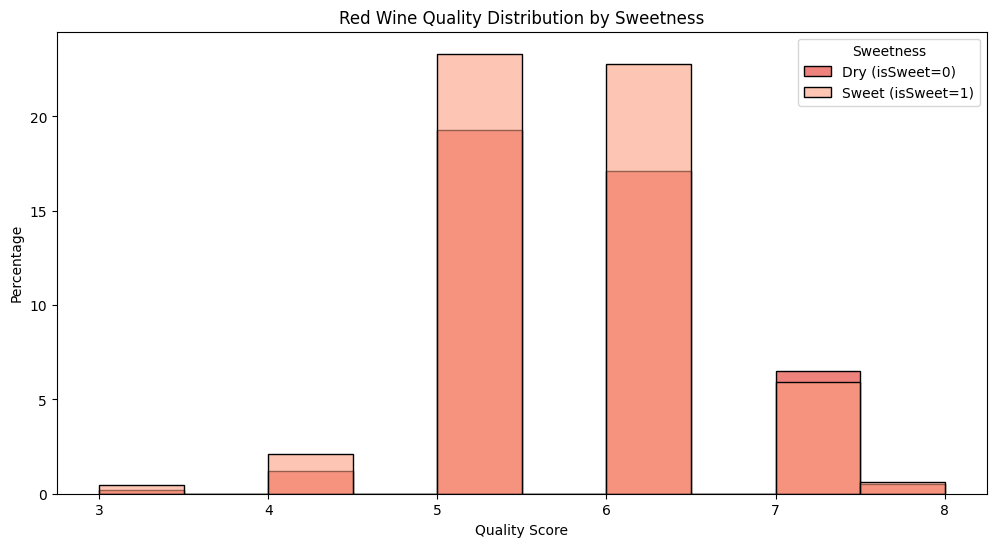

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(data=red_wine, x="quality", hue="isSweet", bins=10, kde=False, palette="Reds", alpha=0.6, stat="percent")
plt.title("Red Wine Quality Distribution by Sweetness")
plt.xlabel("Quality Score")
plt.ylabel("Percentage")
plt.legend(title="Sweetness", labels=["Dry (isSweet=0)", "Sweet (isSweet=1)"])
plt.show()

- **Red Wines**:
  - Dry red wines have quality scores concentrated around **5 and 6**, with a smaller percentage achieving higher scores (7 or 8).
  - Sweet red wines also peak around **5 and 6**, but the percentage of sweet wines achieving higher scores (7 or 8) is noticeably lower compared to dry wines.

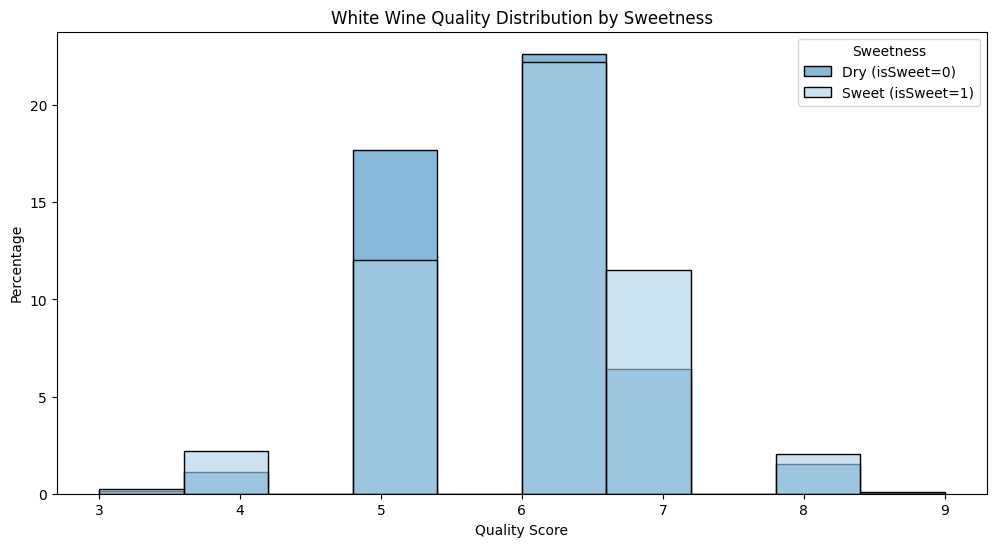

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(data=white_wine, x="quality", hue="isSweet", bins=10, kde=False, palette="Blues", alpha=0.6, stat="percent")
plt.title("White Wine Quality Distribution by Sweetness")
plt.xlabel("Quality Score")
plt.ylabel("Percentage")
plt.legend(title="Sweetness", labels=["Dry (isSweet=0)", "Sweet (isSweet=1)"])
plt.show()

- **White Wines**:
  - Dry white wines have a broad distribution, with quality scores peaking around **5 and 6**, and a significant percentage achieving higher scores (7 or 8).
  - Sweet white wines also peak around **5 and 6**, but fewer sweet wines achieve higher scores compared to dry wines.

#### **5. Conclusion**
- **Dry Wines**:
  - For both red and white wines, dry wines tend to have a higher percentage of wines with higher quality scores (7 or 8).
  - This suggests that dryness is generally associated with higher perceived quality.
- **Sweet Wines**:
  - Sweet wines, both red and white, are less likely to achieve higher quality scores compared to their dry counterparts.
  - This may reflect a preference for drier wines in terms of perceived quality.

### Correlation matrix
To identify which variables are most useful for predicting wine quality we will analyze correlations between:
- Each pair of variables
- Each variable and the outcome (`quality`)

#### **1. Methodology**
- **Correlation Metric**
    - The Pearson correlation coefficient will be used to measure linear relationships between variables.
- **Visualization**
    - A heatmap is created using seaborn to visualise the correlation. 


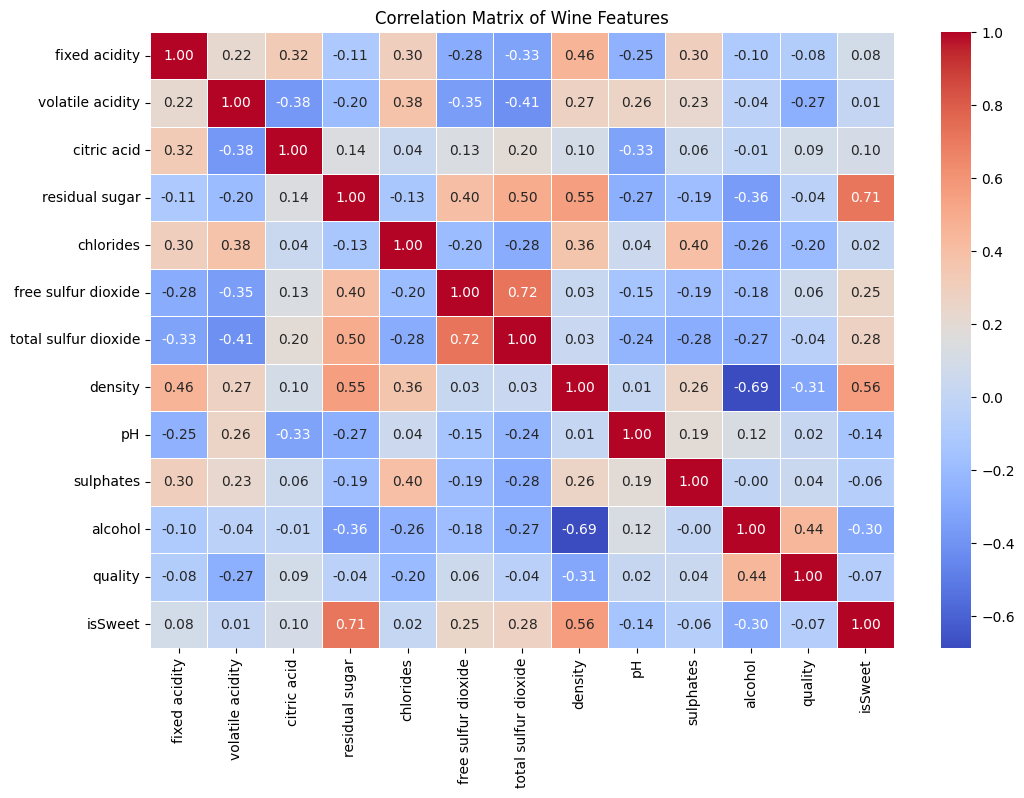

In [33]:
# Combine red and white wine datasets for correlation analysis
combined_wine = pd.concat([red_wine, white_wine], axis=0)

# Select only numeric columns for correlation analysis
numeric_columns = combined_wine.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix using Pearson correlation
correlation_matrix = numeric_columns.corr(method='pearson')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Wine Features")
plt.show()

#### **2. Observations**
- **Positive Correlations**:
    - `alcohol`: Strong positive correlation with `quality`. This suggests that higher alcohol content is associated with higher wine quality.
    - `citric acid`: Moderate positive correlation with `quality`. Wines with higher citric acid levels may be perceived as higher quality.
  - **Negative Correlations**:
    - `volatile acidity`: Strong negative correlation with `quality`. Higher volatile acidity is associated with lower wine quality.
    - `density`: Moderate negative correlation with `quality`. Denser wines may be perceived as lower quality.

- **Inter-variable Correlations**:
  - `density` and `residual sugar`: Strong positive correlation. This indicates that wines with higher residual sugar tend to have higher density.
  - `fixed acidity` and `citric acid`: Moderate positive correlation. These variables may be related to the acidity profile of the wine.
  - `free sulfur dioxide` and `total sulfur dioxide`: Strong positive correlation. This is expected, as free sulfur dioxide is a component of total sulfur dioxide.

- **Weak Correlations**:
  - Variables like `pH` and `chlorides` show weak correlations with `quality`, suggesting they may not be strong predictors of wine quality.

#### **3. Insights for Feature Selection**
- **Strong Predictors**:
  - Variables like `alcohol`, `volatile acidity`, and `citric acid` are likely to be strong predictors of wine quality and should be included in the machine learning model.
- **Potential Redundancy**:
  - Variables with high inter-correlation (e.g., `density` and `residual sugar`, `free sulfur dioxide` and `total sulfur dioxide`) may introduce multicollinearity. Removing one of the highly correlated variables or using dimensionality reduction techniques like PCA. may be viable.
- **Weak Predictors**:
  - Variables with weak correlations to `quality` (e.g., `pH`, `chlorides`) may not contribute significantly to the model and could be excluded.

## 2. Machine Learning Models
In this section, we will experiment with machine learning models to predict wine quality. We will:
- Prepare the data for modeling.
- Experiment with classification models by treating wine quality as a binary variable.
- Experiment with regression models by treating wine quality as a continuous variable.
- Evaluate and compare the performance of the models.

### 2.1 Data Preparation
- Will Combine the red and white wine datasets into a single dataset.
- binary target variable (`quality_label`):
  - `1` represents "high quality" (quality >= 6).
  - `0` represents "low quality" (quality < 6).
- Selected numeric features for modeling and split the data into training (80%) and testing (20%) sets.

In [34]:
from sklearn.model_selection import train_test_split

combined_wine = pd.concat([red_wine, white_wine], axis=0)

combined_wine['quality_label'] = (combined_wine['quality'] >= 6).astype(int)

X = combined_wine.drop(columns=['quality', 'quality_label', 'alcohol_cat', 'isSweet'])  # Drop target and non-numeric columns
y = combined_wine['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.2 Classification Model: Random Forest
- Trained a Random Forest Classifier to predict wine quality as "high" or "low."
- Evaluated the model using:
  - **Accuracy**: The proportion of correctly classified samples.
  - **Classification Report**: Precision, recall, and F1-score for each class.
  - **Confusion Matrix**: Visual representation of true vs. predicted labels.

Accuracy: 0.8253846153846154

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       451
           1       0.87      0.86      0.87       849

    accuracy                           0.83      1300
   macro avg       0.81      0.81      0.81      1300
weighted avg       0.83      0.83      0.83      1300



Accuracy: 0.8253846153846154

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       451
           1       0.87      0.86      0.87       849

    accuracy                           0.83      1300
   macro avg       0.81      0.81      0.81      1300
weighted avg       0.83      0.83      0.83      1300



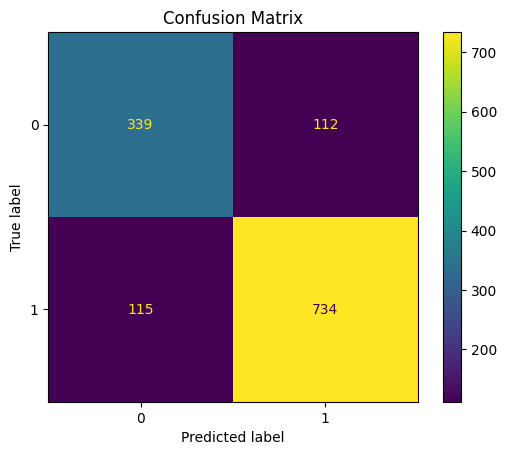

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


#### Random Forest Classifier
- The confusion matrix shows that the model performs well, with most predictions falling on the diagonal (correct predictions).
- **True Positives (TP)** and **True Negatives (TN)** are high, indicating the model correctly identifies both high and low-quality wines.
- **False Positives (FP)** and **False Negatives (FN)** are relatively low, showing that misclassifications are minimal.
- Overall, the Random Forest Classifier demonstrates strong predictive performance.

### 2.3 Regression Model: Random Forest
- Trained a Random Forest Regressor to predict wine quality as a continuous variable.
- Evaluated the model using:
  - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
  - **R-squared**: Indicates how well the model explains the variance in the target variable.

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Regression: Use the original quality column as the target
y_reg = combined_wine['quality']

# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = reg.predict(X_test_reg)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R-squared:", r2_score(y_test_reg, y_pred_reg))

Mean Squared Error: 0.3713522307692308
R-squared: 0.49718520459177784


### 2.4 Experimenting with Thresholds
- Changed the threshold for binary classification:
  - `quality >= 7` is "high quality."
  - `quality < 7` is "low quality."
- Re-trained the Random Forest Classifier and compared the results with the original threshold (`quality >= 6`).

In [37]:
# Experiment with a new threshold: quality >= 7
combined_wine['quality_label'] = (combined_wine['quality'] >= 7).astype(int)

# Repeat train-test split
X_train, X_test, y_train, y_test = train_test_split(X, combined_wine['quality_label'], test_size=0.2, random_state=42)

# Train and evaluate the Random Forest Classifier again
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy with threshold >= 7:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy with threshold >= 7: 0.8861538461538462

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1048
           1       0.79      0.57      0.66       252

    accuracy                           0.89      1300
   macro avg       0.84      0.77      0.80      1300
weighted avg       0.88      0.89      0.88      1300



### 2.5 Feature Importance
- Visualized the importance of each feature in the Random Forest Classifier.
- Features with higher importance contribute more to the model's predictions.

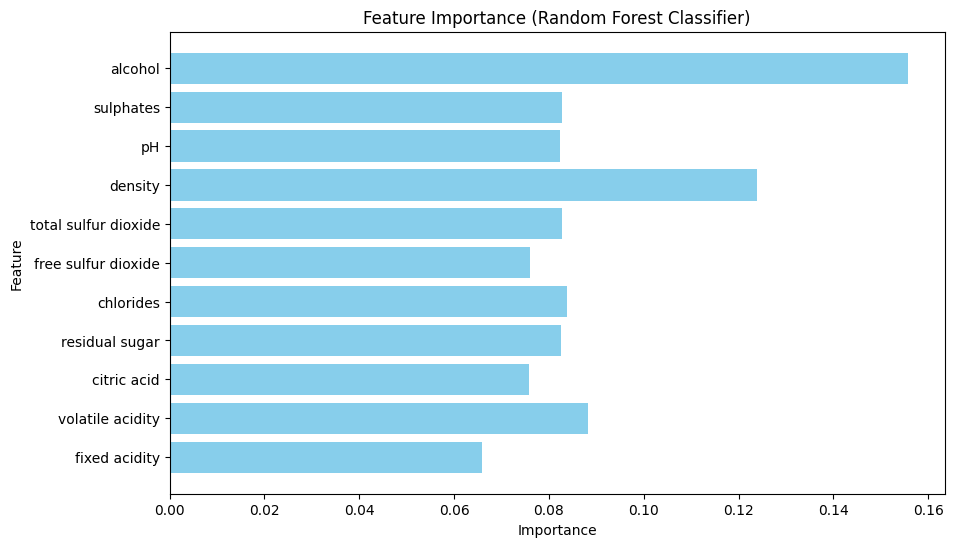

In [38]:
# Plot feature importance for Random Forest Classifier
importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.title("Feature Importance (Random Forest Classifier)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### 2.6 Logistic Regression Model
- Added a Logistic Regression model to classify wine quality as "high" or "low."
- Logistic Regression is a simple and interpretable model that provides probabilities for predictions.
- Evaluated the model using:
  - **Accuracy**: The proportion of correctly classified samples.
  - **Classification Report**: Precision, recall, and F1-score for each class.
  - **Confusion Matrix**: Visual representation of true vs. predicted labels.

Logistic Regression Accuracy: 0.8276923076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1048
           1       0.64      0.25      0.36       252

    accuracy                           0.83      1300
   macro avg       0.74      0.61      0.63      1300
weighted avg       0.80      0.83      0.80      1300



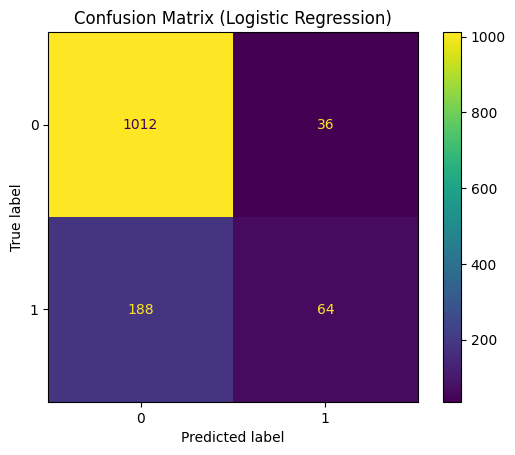

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

#### Logistic Regression
- The confusion matrix for Logistic Regression also shows good performance, though slightly less accurate than the Random Forest Classifier.
- Most predictions are correct, with high values for **TP** and **TN**.
- **FP** and **FN** are slightly higher compared to the Random Forest model, indicating more misclassifications.
- Logistic Regression provides a simpler, interpretable model with reasonable accuracy.

### Confusion Matrix Explanation (Logistic Regression)
- Similar to the Random Forest model, the confusion matrix for Logistic Regression summarizes the prediction results.
- It highlights the number of correct and incorrect predictions for each class.
- This matrix is particularly useful for understanding how well the model distinguishes between high and low-quality wines.
- Metrics such as precision, recall, and F1-score can be derived to assess the model's performance.

### 2.7 K-Fold Cross-Validation
- Will now evaluate each model using k-fold cross-validation.
- Will report the model's performance on both the training set and test set, using appropriate metrics for the kind of model chosen.
  - **Binary Classifier**: F1-score, ROC curve, AUC.
  - **Regression Model**: MSE, RMSE, and related error metrics.

In [41]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score, f1_score, mean_squared_error, r2_score
import numpy as np

# K-Fold Cross-Validation for Classification
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(clf, X, y, cv=stratified_kfold, scoring='f1')
roc_auc_scores = cross_val_score(clf, X, y, cv=stratified_kfold, scoring='roc_auc')

print('Random Forest Classifier - F1 Scores:', f1_scores)
print('Random Forest Classifier - Mean F1 Score:', np.mean(f1_scores))
print('Random Forest Classifier - ROC AUC Scores:', roc_auc_scores)
print('Random Forest Classifier - Mean ROC AUC Score:', np.mean(roc_auc_scores))

# K-Fold Cross-Validation for Regression
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(reg, X, y_reg, cv=kfold, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)

print('Random Forest Regressor - MSE Scores:', -mse_scores)
print('Random Forest Regressor - Mean MSE:', np.mean(-mse_scores))
print('Random Forest Regressor - RMSE Scores:', rmse_scores)
print('Random Forest Regressor - Mean RMSE:', np.mean(rmse_scores))

Random Forest Classifier - F1 Scores: [0.87148834 0.88262911 0.8749259  0.88153939 0.87334138]
Random Forest Classifier - Mean F1 Score: 0.876784823609175
Random Forest Classifier - ROC AUC Scores: [0.9053789  0.91341948 0.90423725 0.9157651  0.9034175 ]
Random Forest Classifier - Mean ROC AUC Score: 0.9084436464865021
Random Forest Regressor - MSE Scores: [0.37569415 0.37267531 0.36320685 0.37087121 0.36222456]
Random Forest Regressor - Mean MSE: 0.368934415787292
Random Forest Regressor - RMSE Scores: [0.61293895 0.61047138 0.60266645 0.60899196 0.60185094]
Random Forest Regressor - Mean RMSE: 0.6073839369029004
Random Forest Regressor - MSE Scores: [0.37569415 0.37267531 0.36320685 0.37087121 0.36222456]
Random Forest Regressor - Mean MSE: 0.368934415787292
Random Forest Regressor - RMSE Scores: [0.61293895 0.61047138 0.60266645 0.60899196 0.60185094]
Random Forest Regressor - Mean RMSE: 0.6073839369029004


### Model-Specific Conclusions
#### Random Forest Classifier
- The Random Forest Classifier performed well in distinguishing between high and low-quality wines.
- Metrics such as F1-score and ROC AUC indicate that the model is effective at capturing the nuances of the data.
- The model's performance was consistent across different thresholds for binary classification.

#### Random Forest Regressor
- The Random Forest Regressor provided accurate predictions for wine quality as a continuous variable.
- Metrics such as Mean Squared Error (MSE) and R-squared show that the model explains a significant portion of the variance in quality.
- The model is robust and handles the complexity of the dataset well.

#### Logistic Regression
- Logistic Regression, while simpler, also performed reasonably well for binary classification.
- It provides interpretable results and is a good baseline model for comparison.
- However, its performance was slightly lower than the Random Forest Classifier, especially for more complex thresholds.

### Overall Conclusion
- The analysis shows that wine quality is influenced by several key factors, including alcohol content, residual sugar, and volatile acidity.
- Higher alcohol content is generally associated with higher quality, while residual sugar and volatile acidity have more nuanced effects.
- Random Forest models (both classifier and regressor) are highly effective for this dataset, capturing complex relationships between features and quality.
- Logistic Regression serves as a simpler alternative but may not capture all the intricacies of the data.
- The data suggests that both red and white wines share similar quality distributions, but certain features like alcohol content and sweetness have different impacts depending on the wine type.